In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.linalg import null_space
import numpy as np
from numpy.linalg import norm
from functools import partial
from itertools import combinations
from cycler import cycler
import matplotlib.colors as mcolors

In [2]:
def cross_matrix(x):
    return np.cross(np.identity(3), x)

In [3]:
idx = (np.loadtxt('data4/idx.txt')).astype(int) - 1

In [4]:
K = np.loadtxt('data4/K.txt')

In [5]:
u3 = np.loadtxt('data4/u1.txt')

In [6]:
def normalize(v):
    return (v - np.mean(v, axis=0)) / np.std(v, axis=0)

In [7]:
u1 = np.loadtxt('data4/u1.txt')[idx]
u1_beta = np.hstack(
    (
        u1, 
        np.ones((u1.shape[0], 1))
    )
)

In [8]:
u2 = np.loadtxt('data4/u2.txt')[idx]
u2_beta = np.hstack(
    (
        u2, 
        np.ones((u2.shape[0], 1))
    )
)

In [9]:
u1

array([[393.2168 , 501.81492],
       [653.80435, 511.12162],
       [940.45065, 256.1181 ],
       [800.85018, 423.63866],
       [689.1698 , 330.57168],
       [618.4389 , 243.08872],
       [475.11575, 300.79025],
       [167.99471, 177.94183]])

In [10]:
A = np.empty((len(idx), 3*3))
for i, (u1_beta_i, u2_beta_i) in enumerate(zip(u1_beta, u2_beta)):
    A[i] = np.kron(u1_beta_i, u2_beta_i)
G = null_space(A).reshape(3, 3).T
print(G, np.linalg.matrix_rank(G))

[[-7.98310768e-07  1.68628778e-06  5.52750070e-03]
 [-2.67175716e-06  2.45383772e-06  1.54353500e-02]
 [-9.74468508e-03 -1.32149681e-02  9.99730765e-01]] 3


In [11]:
U, S, V = np.linalg.svd(G)
S[-1] = 0
F = U @ np.diag(S) @ V
print(F, np.linalg.matrix_rank(F))


[[-5.52822278e-07  1.51075206e-06  5.52750077e-03]
 [-2.76039240e-06  2.51721605e-06  1.54353500e-02]
 [-9.74468507e-03 -1.32149681e-02  9.99730765e-01]] 2


In [12]:
ep1 = null_space(F)
ep1 = ep1 / ep1[-1]

ep2 = null_space(F.T)
ep2 = ep2 / ep2[-1]

In [13]:
E1 = K.T @ F @ K
U, D, V = np.linalg.svd(E1) 
D[1] = D[0];
E = U @ np.diag(D) @ V
print(np.linalg.det(E))

-5.17553157239598e-11


In [14]:
def abline(k, b):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = k * x_vals + b
    plt.plot(x_vals, y_vals, '--')

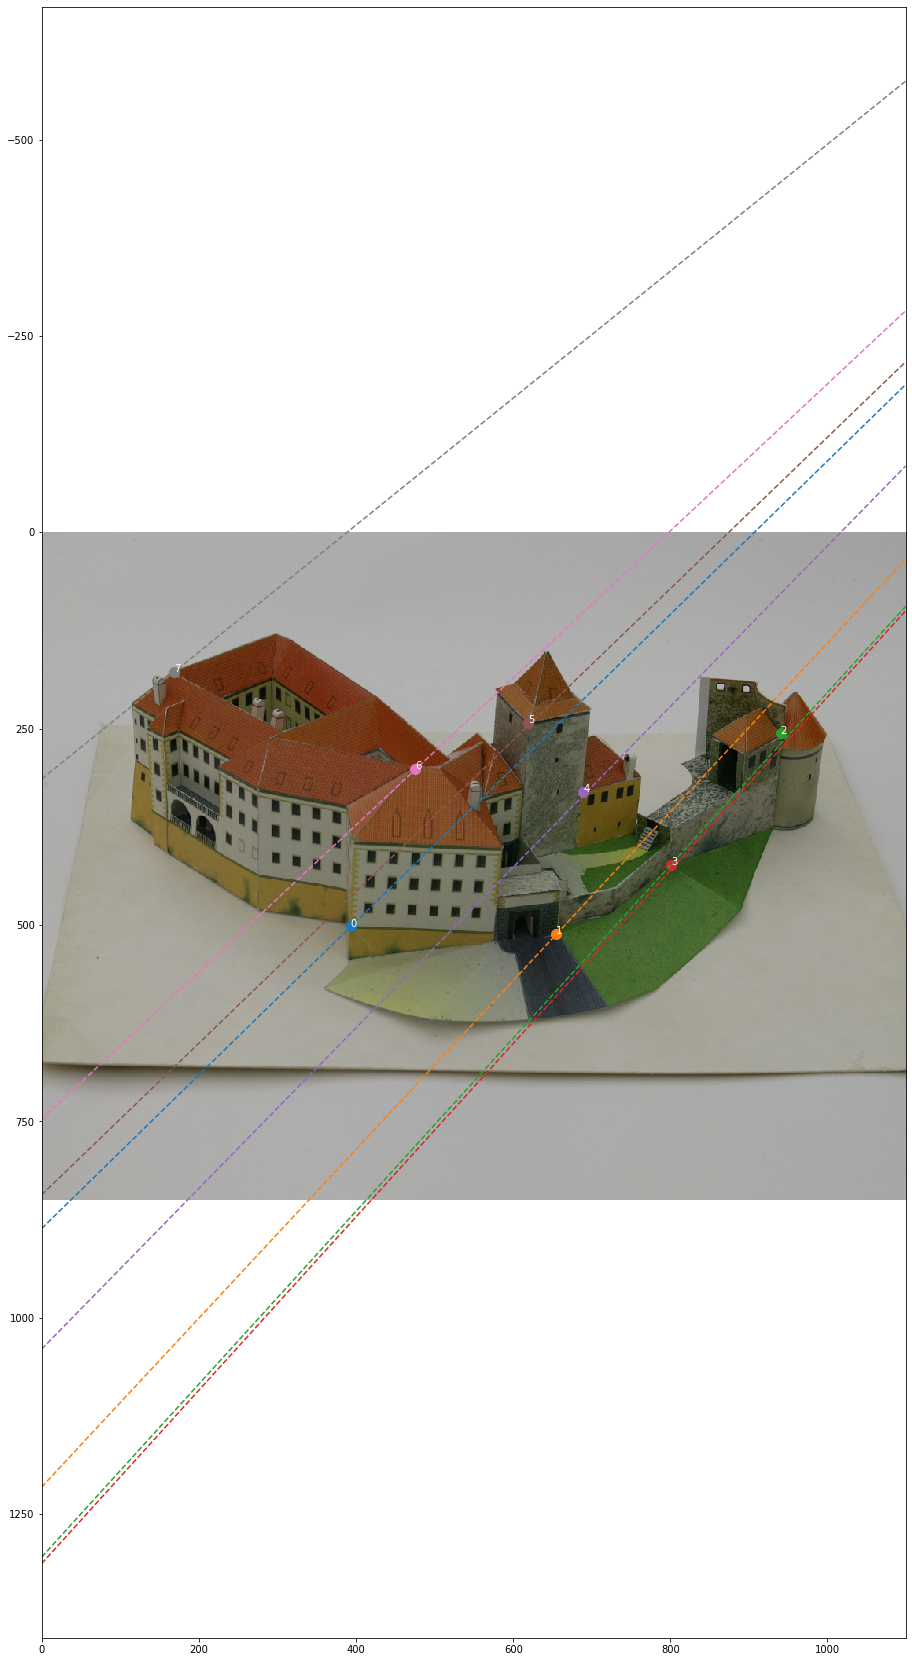

In [15]:
plt.rcParams["figure.figsize"] = (30, 30)
img1 = mpimg.imread('data4/daliborka_01.jpg')

plt.gca().set_prop_cycle(cycler(color=mcolors.TABLEAU_COLORS))
for x, y in u1:   
    plt.scatter(x, y, s=100)

# plt.scatter(ep1[0], ep1[1], s=400)
for i, p in enumerate(u1):
    plt.annotate(i, p, c='w')
plt.imshow(img1)

l1 = F.T @ u2_beta.T
plt.gca().set_prop_cycle(cycler(color=mcolors.TABLEAU_COLORS))
for x in l1.T:
    abline(-x[0]/x[1], -x[2]/x[1])

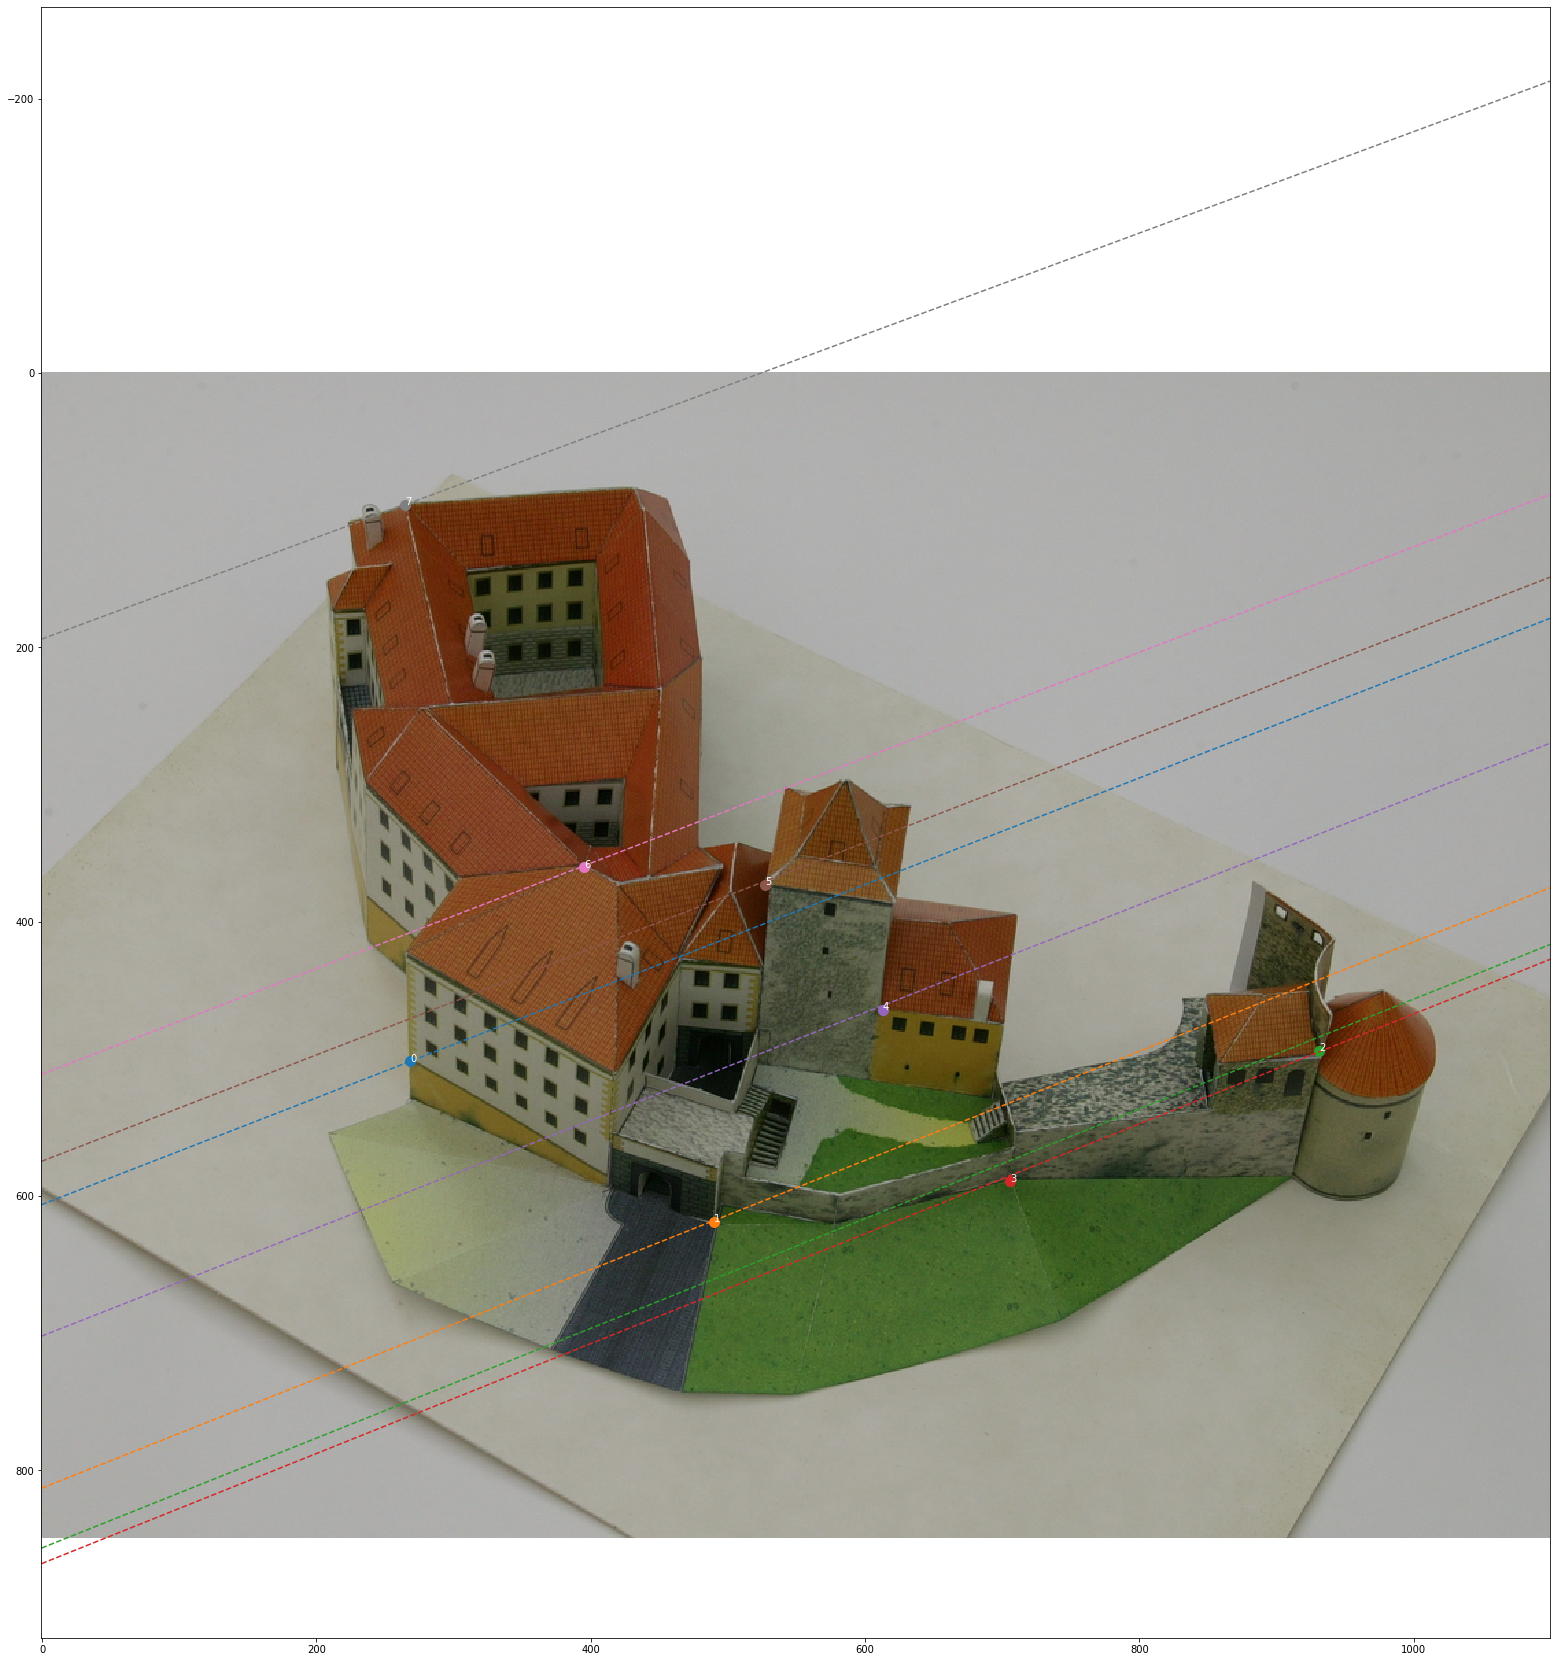

In [16]:
plt.rcParams["figure.figsize"] = (30, 30)
img1 = mpimg.imread('data4/daliborka_23.jpg')

plt.gca().set_prop_cycle(cycler(color=mcolors.TABLEAU_COLORS))
for x, y in u2:   
    plt.scatter(x, y, s=100)

# plt.scatter(ep2[0], ep2[1], s=400)
for i, p in enumerate(u2):
    plt.annotate(i, p, c='w')
plt.imshow(img1)

l2 = F @ u1_beta.T
plt.gca().set_prop_cycle(cycler(color=mcolors.TABLEAU_COLORS))
for x in l2.T:
    abline(-x[0]/x[1], -x[2]/x[1])